# Project 

## Import Data

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
di = '/Users/cyrille/code/nicolaslecorvec/gravit_waves/train'
df = pd.read_csv(di + '/_labels.csv')
df = df[df.target >= 0]  # Remove 3 unknowns (target = -1)

In [7]:
df.keys()

Index(['id', 'target'], dtype='object')

In [12]:
df

id  target
0    001121a05       1
1    004f23b2d       1
2    00a6db666       1
3    00f36a6ac       1
4    010a387db       1
..         ...     ...
598  fe38dbe64       1
599  feafd0d16       1
600  feeca844e       1
601  ff5ad023f       1
602  ffa1d19c7       1

[600 rows x 2 columns]

## Analyse de la Data

In [14]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import pyfstat

from scipy import stats

%matplotlib inline

22-11-28 12:39:55.281 pyfstat INFO    : Running PyFstat version 1.18.1
22-11-28 12:40:01.154 pyfstat.utils.importing INFO    : No $DISPLAY environment variable found, so importing matplotlib.pyplot with non-interactive 'Agg' backend.


22-11-28 12:40:01.544 pyfstat.core INFO    : Creating Writer object...
22-11-28 12:40:01.544 pyfstat.utils.ephemeris INFO    : No /Users/cyrille/.pyfstat.conf file found. Will fall back to lal's automatic path resolution for files [earth00-40-DE405.dat.gz,sun00-40-DE405.dat.gz]. Alternatively, set 'earth_ephem' and 'sun_ephem' class options.
22-11-28 12:40:01.545 pyfstat.make_sfts INFO    : Estimating required SFT frequency range from properties of signal to inject plus 59 extra bins either side (corresponding to default F-statistic settings).
22-11-28 12:40:01.547 pyfstat.make_sfts INFO    : Generating SFTs with fmin=99.99847035310518, Band=0.0956952876600998
22-11-28 12:40:01.547 pyfstat.make_sfts INFO    : Checking if we can re-use injection config file...
22-11-28 12:40:01.547 pyfstat.make_sfts INFO    : ...no config file PyFstat_example_data_ensemble/Signal_0/Signal_0.cff found.
22-11-28 12:40:01.547 pyfstat.make_sfts INFO    : Writing config file: PyFstat_example_data_ensemble/Si

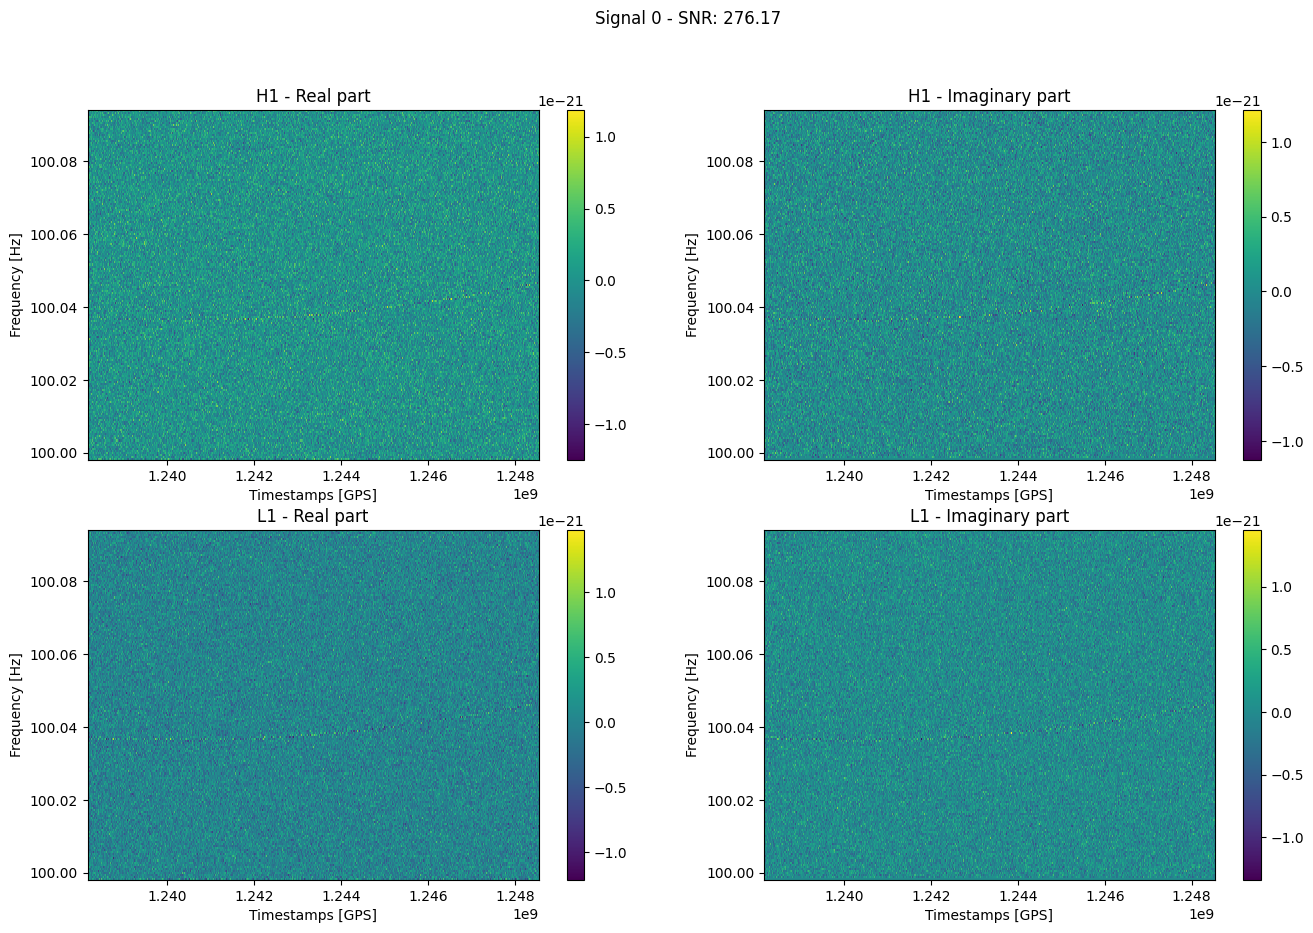

22-11-28 12:40:09.734 pyfstat.core INFO    : Creating Writer object...
22-11-28 12:40:09.737 pyfstat.utils.ephemeris INFO    : No /Users/cyrille/.pyfstat.conf file found. Will fall back to lal's automatic path resolution for files [earth00-40-DE405.dat.gz,sun00-40-DE405.dat.gz]. Alternatively, set 'earth_ephem' and 'sun_ephem' class options.
22-11-28 12:40:09.738 pyfstat.make_sfts INFO    : Estimating required SFT frequency range from properties of signal to inject plus 59 extra bins either side (corresponding to default F-statistic settings).
22-11-28 12:40:09.740 pyfstat.make_sfts INFO    : Generating SFTs with fmin=99.99836677993108, Band=0.10505977967238109
22-11-28 12:40:09.740 pyfstat.make_sfts INFO    : Checking if we can re-use injection config file...
22-11-28 12:40:09.740 pyfstat.make_sfts INFO    : ...no config file PyFstat_example_data_ensemble/Signal_1/Signal_1.cff found.
22-11-28 12:40:09.741 pyfstat.make_sfts INFO    : Writing config file: PyFstat_example_data_ensemble/S

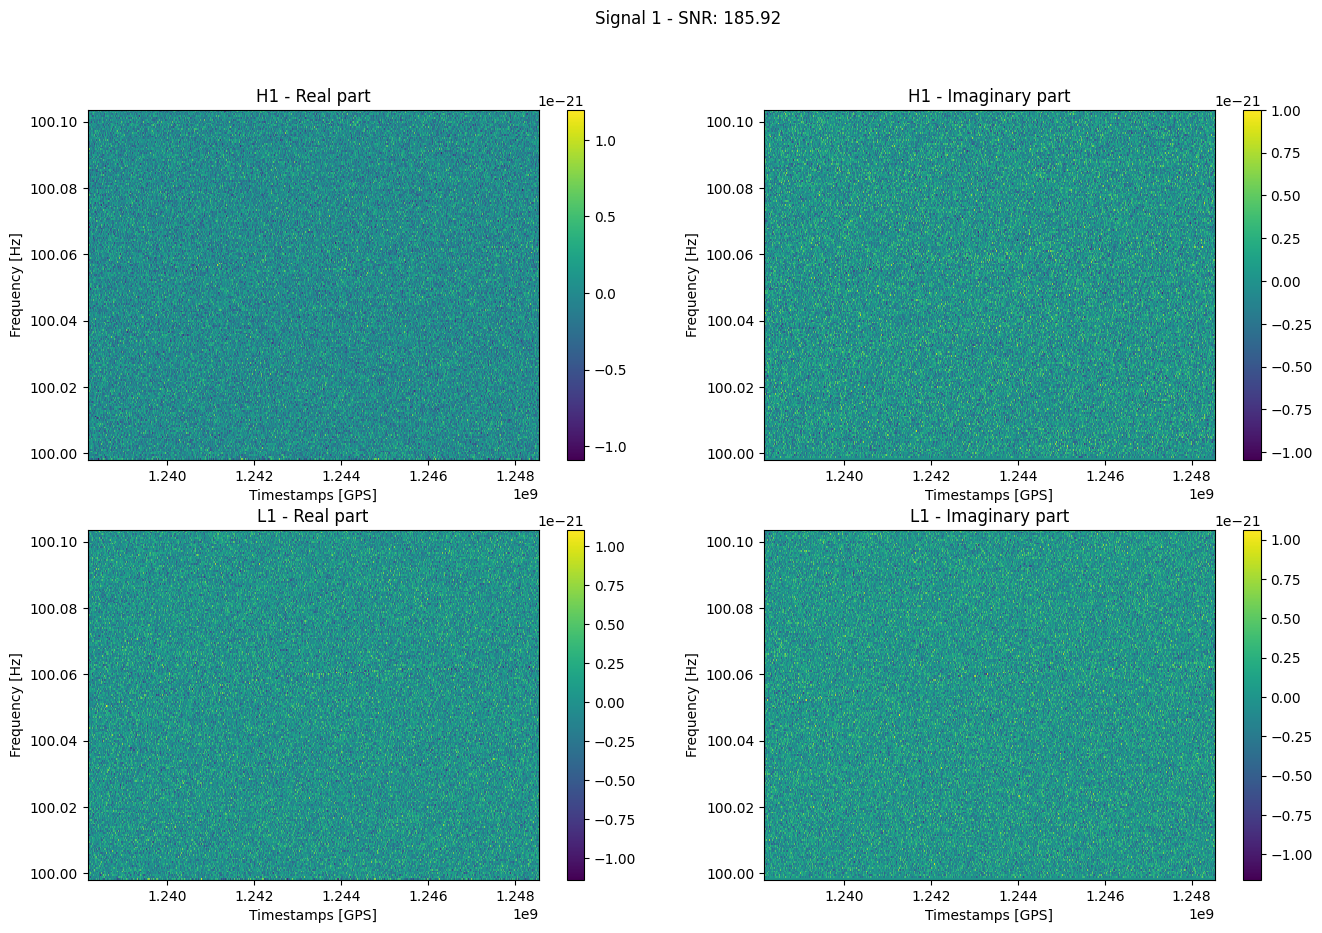

22-11-28 12:40:17.666 pyfstat.core INFO    : Creating Writer object...
22-11-28 12:40:17.666 pyfstat.utils.ephemeris INFO    : No /Users/cyrille/.pyfstat.conf file found. Will fall back to lal's automatic path resolution for files [earth00-40-DE405.dat.gz,sun00-40-DE405.dat.gz]. Alternatively, set 'earth_ephem' and 'sun_ephem' class options.
22-11-28 12:40:17.667 pyfstat.make_sfts INFO    : Estimating required SFT frequency range from properties of signal to inject plus 59 extra bins either side (corresponding to default F-statistic settings).
22-11-28 12:40:17.669 pyfstat.make_sfts INFO    : Generating SFTs with fmin=100.03336624023996, Band=0.08983833910026148
22-11-28 12:40:17.669 pyfstat.make_sfts INFO    : Checking if we can re-use injection config file...
22-11-28 12:40:17.669 pyfstat.make_sfts INFO    : ...no config file PyFstat_example_data_ensemble/Signal_2/Signal_2.cff found.
22-11-28 12:40:17.669 pyfstat.make_sfts INFO    : Writing config file: PyFstat_example_data_ensemble/

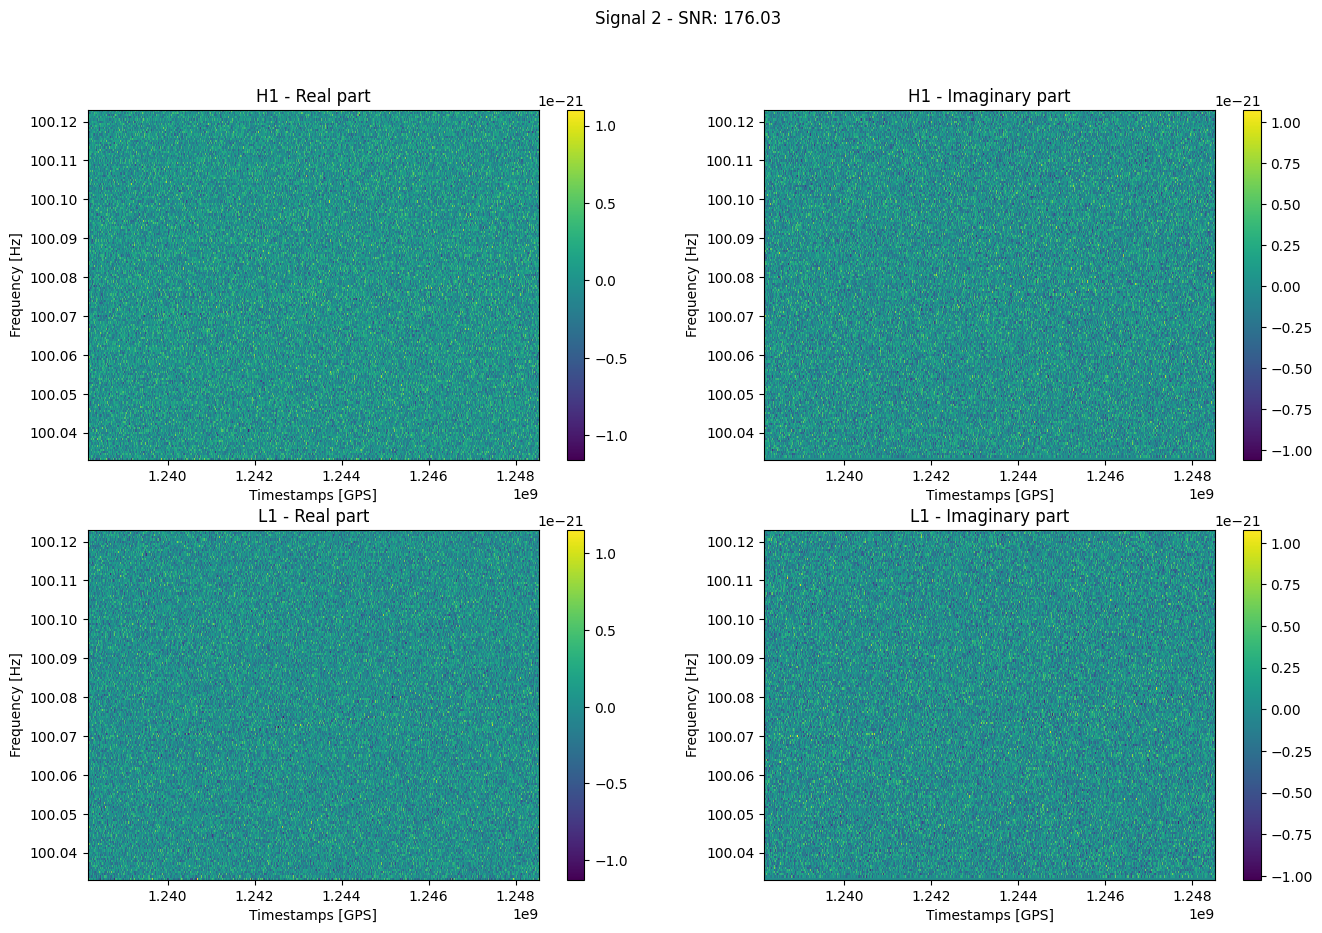

22-11-28 12:40:25.514 pyfstat.core INFO    : Creating Writer object...
22-11-28 12:40:25.515 pyfstat.utils.ephemeris INFO    : No /Users/cyrille/.pyfstat.conf file found. Will fall back to lal's automatic path resolution for files [earth00-40-DE405.dat.gz,sun00-40-DE405.dat.gz]. Alternatively, set 'earth_ephem' and 'sun_ephem' class options.
22-11-28 12:40:25.516 pyfstat.make_sfts INFO    : Estimating required SFT frequency range from properties of signal to inject plus 59 extra bins either side (corresponding to default F-statistic settings).
22-11-28 12:40:25.518 pyfstat.make_sfts INFO    : Generating SFTs with fmin=99.98747746994702, Band=0.08897912140339101
22-11-28 12:40:25.518 pyfstat.make_sfts INFO    : Checking if we can re-use injection config file...
22-11-28 12:40:25.518 pyfstat.make_sfts INFO    : ...no config file PyFstat_example_data_ensemble/Signal_3/Signal_3.cff found.
22-11-28 12:40:25.519 pyfstat.make_sfts INFO    : Writing config file: PyFstat_example_data_ensemble/S

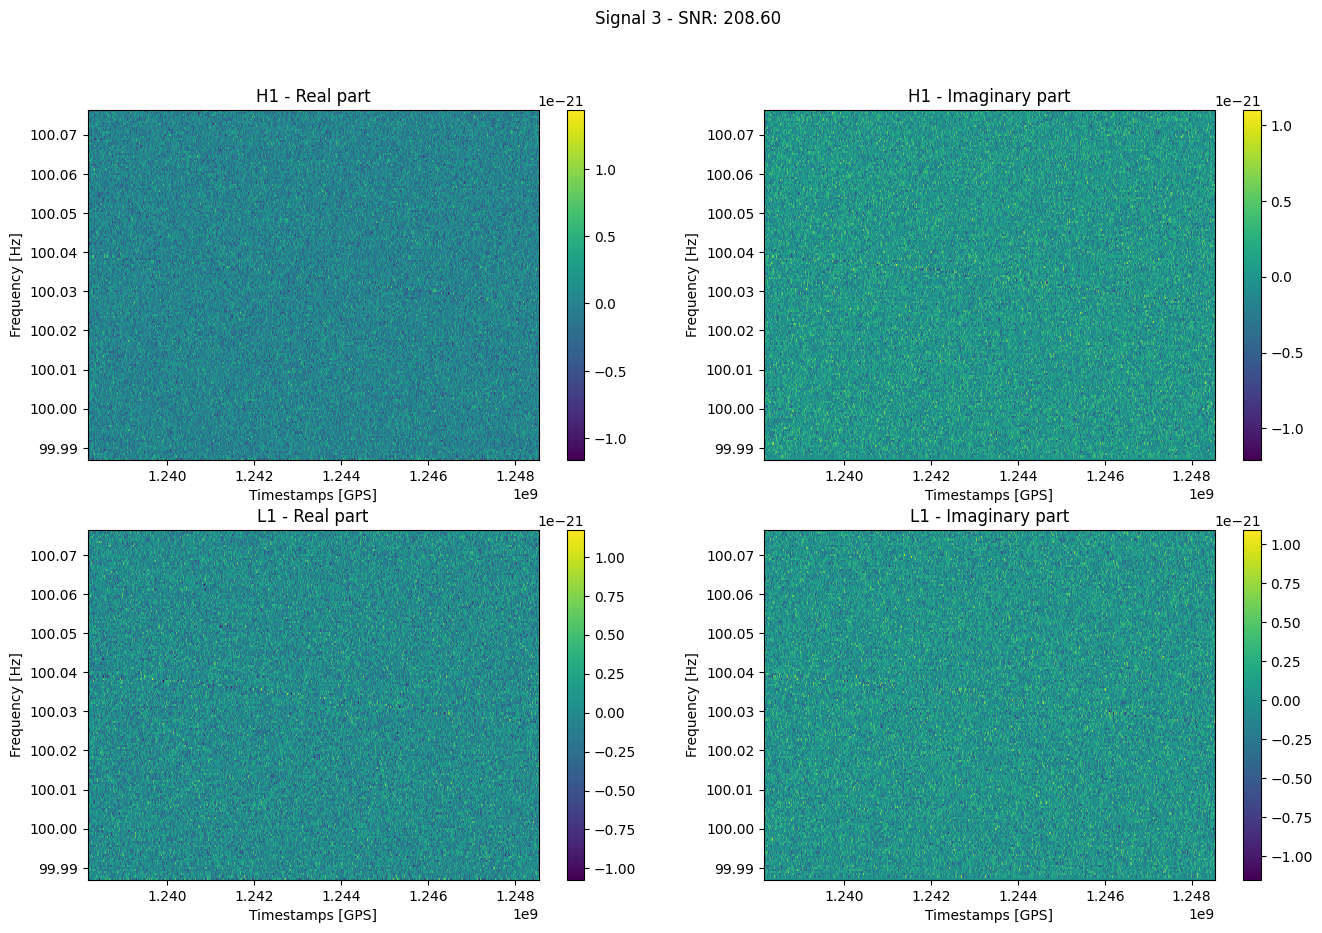

22-11-28 12:40:33.383 pyfstat.core INFO    : Creating Writer object...
22-11-28 12:40:33.384 pyfstat.utils.ephemeris INFO    : No /Users/cyrille/.pyfstat.conf file found. Will fall back to lal's automatic path resolution for files [earth00-40-DE405.dat.gz,sun00-40-DE405.dat.gz]. Alternatively, set 'earth_ephem' and 'sun_ephem' class options.
22-11-28 12:40:33.385 pyfstat.make_sfts INFO    : Estimating required SFT frequency range from properties of signal to inject plus 59 extra bins either side (corresponding to default F-statistic settings).
22-11-28 12:40:33.387 pyfstat.make_sfts INFO    : Generating SFTs with fmin=99.98700681749494, Band=0.10536569444426688
22-11-28 12:40:33.387 pyfstat.make_sfts INFO    : Checking if we can re-use injection config file...
22-11-28 12:40:33.387 pyfstat.make_sfts INFO    : ...no config file PyFstat_example_data_ensemble/Signal_4/Signal_4.cff found.
22-11-28 12:40:33.387 pyfstat.make_sfts INFO    : Writing config file: PyFstat_example_data_ensemble/S

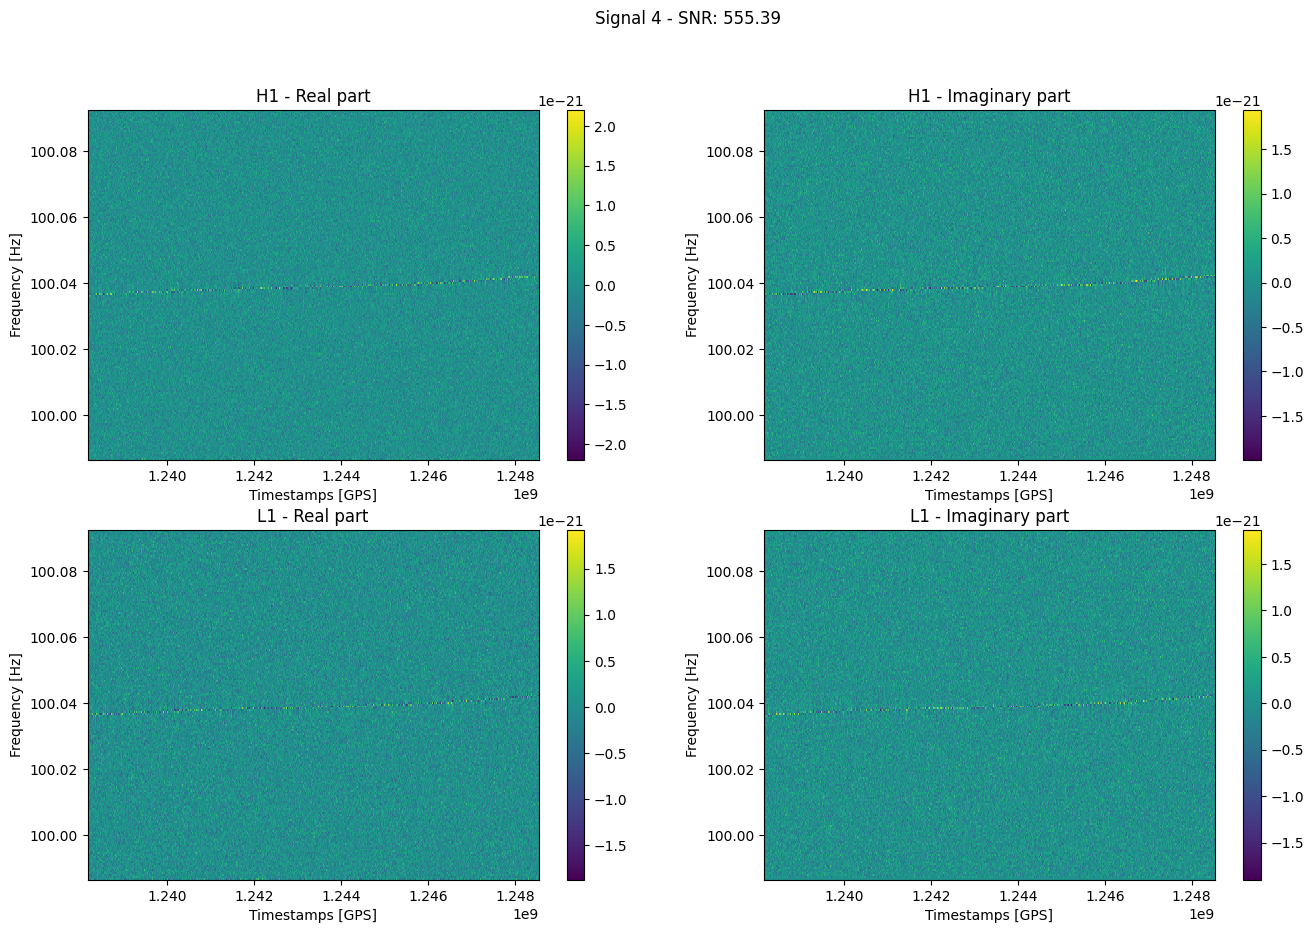

In [15]:
# Generate signals with parameters drawn from a specific population
num_signals = 5

# These parameters describe background noise and data format
writer_kwargs = {
                "tstart": 1238166018,
                "duration": 4 * 30 * 86400,  
                "detectors": "H1,L1",        
                "sqrtSX": 1e-23,          
                "Tsft": 1800,             
                "SFTWindowType": "tukey", 
                "SFTWindowBeta": 0.01,
               }

# This class allows us to sample signal parameters from a specific population.
# Implicitly, sky positions are drawn uniformly across the celestial sphere.
# PyFstat also implements a convenient set of priors to sample a population
# of isotropically oriented neutron stars.
signal_parameters_generator = pyfstat.AllSkyInjectionParametersGenerator(
    priors={
        "tref": writer_kwargs["tstart"],
        "F0": {"uniform": {"low": 100.0, "high": 100.1}},
        "F1": lambda: 10**stats.uniform(-12, 4).rvs(),
        "F2": 0,
        "h0": lambda: writer_kwargs["sqrtSX"] / stats.uniform(1, 10).rvs(),
        **pyfstat.injection_parameters.isotropic_amplitude_priors,
    },
)

snrs = np.zeros(num_signals)

for ind in range(num_signals):

    # Draw signal parameters.
    # Noise can be drawn by setting `params["h0"] = 0
    params = signal_parameters_generator.draw()
    writer_kwargs["outdir"] = f"PyFstat_example_data_ensemble/Signal_{ind}"
    writer_kwargs["label"] = f"Signal_{ind}"
    
    writer = pyfstat.Writer(**writer_kwargs, **params)
    writer.make_data()
    
    # SNR can be compute from a set of SFTs for a specific set
    # of parameters as follows:
    snr = pyfstat.SignalToNoiseRatio.from_sfts(
        F0=writer.F0, sftfilepath=writer.sftfilepath
    )
    squared_snr = snr.compute_snr2(
        Alpha=writer.Alpha, 
        Delta=writer.Delta,
        psi=writer.psi,
        phi=writer.phi, 
        h0=writer.h0,
        cosi=writer.cosi
    )
    snrs[ind] = np.sqrt(squared_snr)
    
    # Data can be read as a numpy array using PyFstat
    frequency, timestamps, amplitudes = pyfstat.utils.get_sft_as_arrays(
        writer.sftfilepath
    )
    
    fig, ax = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f"Signal {ind} - SNR: {snrs[ind]:.2f}")
    for d_ind, detector in enumerate(amplitudes.keys()):
        ax[d_ind][0].set(xlabel="Timestamps [GPS]",
                         ylabel="Frequency [Hz]",
                         title=f"{detector} - Real part")
        ax[d_ind][1].set(xlabel="Timestamps [GPS]",
                         ylabel="Frequency [Hz]",
                         title=f"{detector} - Imaginary part")
        
        c0 = ax[d_ind][0].pcolormesh(timestamps[detector], frequency,
                                     amplitudes[detector].real)
        c1 = ax[d_ind][1].pcolormesh(timestamps[detector], frequency,
                                     amplitudes[detector].imag)
        
        fig.colorbar(c0, ax=ax[d_ind][0])
        fig.colorbar(c1, ax=ax[d_ind][1])
    plt.show()

In [28]:
snrs

array([276.1703582 , 185.91893238, 176.03429385, 208.60102061,
       555.38833466])

In [27]:
def extract_data_from_hdf5(path, labels):
    '''
    Extracts data from hdf5 file and puts it into a dict. It also adds the label
    '''
    
    data = {}
    
    with h5py.File(path, "r") as f:

        ID_key = list(f.keys())[0]

        # Retrieve the frequency data
        data['freq'] = np.array(f[ID_key]['frequency_Hz'])

        # Retrieve the Livingston decector data
        data['L1_SFTs_amplitudes'] = np.array(f[ID_key]['L1']['SFTs'])
        data['L1_ts'] = np.array(f[ID_key]['L1']['timestamps_GPS'])

        # Retrieve the Hanford decector data
        data['H1_SFTs_amplitudes'] = np.array(f[ID_key]['H1']['SFTs'])
        data['H1_ts'] = np.array(f[ID_key]['H1']['timestamps_GPS'])
        
        # Get label from training labels if in training set
        data['label'] = labels.loc[labels.id==ID_key].target.item()
        
    return data